# Funciones utilizadas:

- NetworkX
  - nx.Graph()
  - nx.draw()
  - G.nodes
  - G.edges
  - G.degree
  - G.add_node()
  - G.add_edges()
  - nx.from_numpy_matrix()
  - nx.DiGraph()

- Numpy
  - np.array()
  - np.reshape()
  - A.dot(B)
  - roll

- Matplotlib 
  - plt.imshow()

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Clase Graph()
La clase ```Graph()``` nos permite generar los objetos de mayor interés para este curso: las gráficas o redes. En las siguientes notebooks se explican las funciones más importantes relacionadas con las redes que utilizaremos.

In [ ]:
#se crea un objeto de clase Graph y 
#se guarda en la variable G para aplicarle funciones y analizar sus propiedades

G = nx.Graph() 

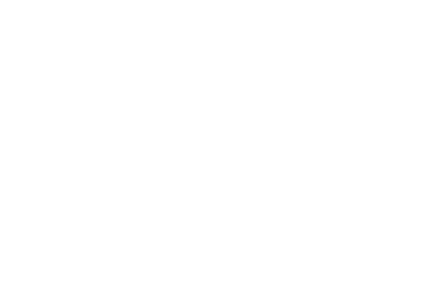

In [ ]:
# La funcion draw nos da una visualizacion simple de la red generada.
# En este caso, como la red todavia no tiene nodos ni enlaces, solo se 
# muestra un "lienzo" blanco:

nx.draw(G) 

In [ ]:
# Un objeto de tipo Graph tiene una propiedad llamada nodes y es la lista de nodos.
# En el caso de la red que creamos no es otra cosa que una lista sin elementos:

G.nodes

NodeView(())

In [ ]:
# Otra propiedad es edges, que es la lista de los enlaces de la red.
# Como se vio antes, un enlace es en primer lugar una pareja de nodos. Entonces,
# la propiedad edges es una lista de parejas de nodos. En el caso de nuestra red
# vuelve a ser una lista sin elementos

G.edges

EdgeView([])

Para un nodo a nuestra red se utiliza la función ```add_node()``` . La estructura es ```[Red].add_node([nombre del nodo])``` . El nombre del nodo puede ser un número entero o una cadena de caracteres alfanumericos; en este último caso, se debe escribir entre comillas:

In [ ]:
G.add_node('Nodo 1') # se agrega el nodo "Nodo 1"

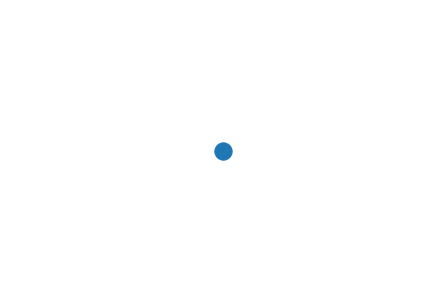

In [ ]:
nx.draw(G)  # la visualizacion ya no es un lienzo blanco

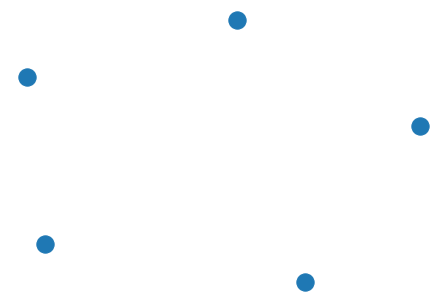

In [ ]:
G.add_node('Nodo 2') #se agregan otros nodos
G.add_node('Nodo 3')
G.add_node('Nodo 4')
G.add_node('Nodo 5')

nx.draw(G)   #se visualiza

Ya que la red tiene varios nodos, se pueden agregar los enlaces mediante la función ```add_edge()```. Notar la estructura de la función que tiene como argumentos los dos nodos que queremos enlazar.

In [ ]:
G.add_edge('Nodo 1', 'Nodo 2')
G.add_edge('Nodo 1', 'Nodo 3')
G.add_edge('Nodo 1', 'Nodo 4')
G.add_edge('Nodo 3', 'Nodo 5')

La función ```draw()``` puede recibir varios argumentos, además del objeto ```graph()```, como iremos viendo. Para identificar a los enlaces utilizaremos el argumento ```with_labels = True```. Para jugar con el resto de los argumentos de la función, revisar la documentación de la función ```draw_networkx()```, con la que comparte todos los argumentos: https://networkx.org/documentation/networkx-1.7/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

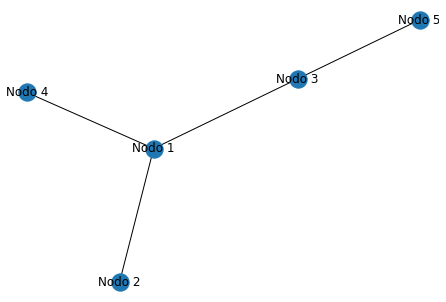

In [ ]:
nx.draw(G, with_labels = True)

In [ ]:
G.nodes

NodeView(('Nodo 1', 'Nodo 2', 'Nodo 3', 'Nodo 4', 'Nodo 5'))

In [ ]:
G.edges

EdgeView([('Nodo 1', 'Nodo 2'), ('Nodo 1', 'Nodo 3'), ('Nodo 1', 'Nodo 4'), ('Nodo 3', 'Nodo 5')])

Una última propiedad que se verá por ahora es ```degree```, el grado de los nodos de una red. Se trata de un objeto tipo diccionario en el que a cada nodo le asocia el número "vecinos" que tiene:

In [ ]:
G.degree

DegreeView({'Nodo 1': 3, 'Nodo 2': 1, 'Nodo 3': 2, 'Nodo 4': 1, 'Nodo 5': 1})

# Estructuras simples

In [ ]:
G1 = nx.Graph()

A la red también se le pueden agregar nodos identificados con números en lugar de cadenas. Esto nos facilitará agregar nodos dentro de bucles:

In [ ]:
G1.add_node(0)
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)

G1.nodes

NodeView((0, 1, 2, 3))

In [ ]:
for i in range(10):
  G1.add_node(i)

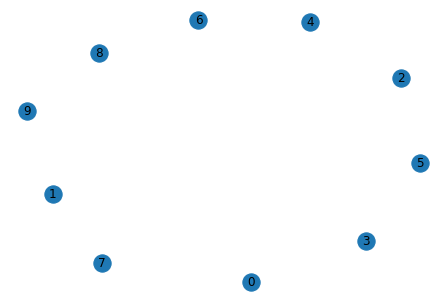

In [ ]:
nx.draw(G1, with_labels= True)

## Red lineal

In [ ]:
N = 10

G_lineal = nx.Graph()


for i in range(N - 1):
  G_lineal.add_edge(i, i+1)

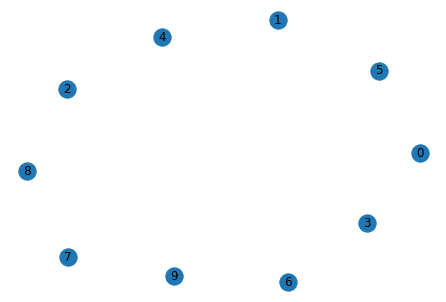

In [ ]:
nx.draw(G1, with_labels = True)

In [ ]:
G1.degree

DegreeView({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0})

## Red circular

In [ ]:
G_circular = nx.Graph()

N = 5

for i in range(N):
  G_circular.add_node(i)
lista_nodos = list(G_circular.nodes)

for i in range(N):
  G_circular.add_edge(lista_nodos[i], lista_nodos[i - 1])


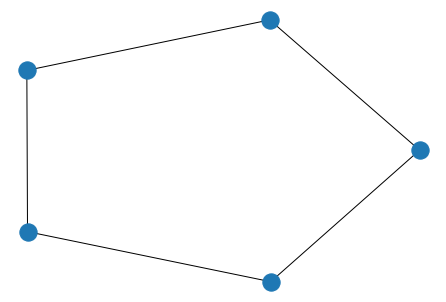

In [ ]:
nx.draw(G_circular)

## Red anillo a segundos, terceros, y n-vecinos

In [ ]:
G_anillo = nx.Graph()

N = 25

for i in range(N):
  G_anillo.add_node(i)

lista_nodos = list(G_anillo.nodes)

for i in range(N):
  G_anillo.add_edge(lista_nodos[i], lista_nodos[i-1]) #primeros vecinos
  G_anillo.add_edge(lista_nodos[i], lista_nodos[i-2]) #segundos vecinos
  G_anillo.add_edge(lista_nodos[i], lista_nodos[i-3]) #terceros vecinos

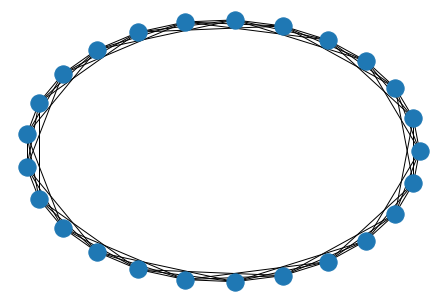

In [ ]:
nx.draw_circular(G_anillo)

## Red completa

In [ ]:
G_completa = nx.Graph()

N = 15

for i in range(N):
  for j in range(i):
    G_completa.add_edge(i,j)

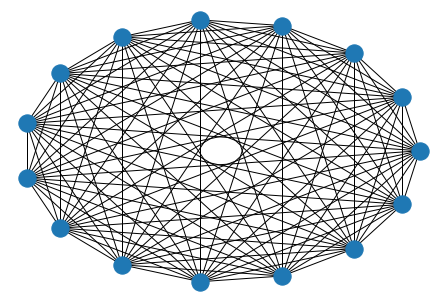

In [ ]:
nx.draw_circular(G_completa)

## Funciones en python

In [ ]:
def Anillo(N):
  # generar la red
  Red = nx.Graph()

  # agregar los nodos
  for i in range(N):
    Red.add_node(i)

  lista_nodos = list(Red.nodes)

  for i in range(N):
    Red.add_edge( lista_nodos[i-1] , lista_nodos[i] )
    Red.add_edge( lista_nodos[i-2] , lista_nodos[i] )
    Red.add_edge( lista_nodos[i-3] , lista_nodos[i] )
  
  #graficar la red
  nx.draw_circular(Red)

  return Red

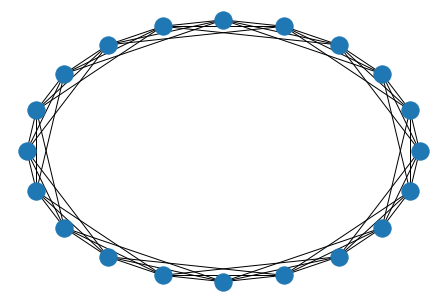

In [ ]:
anillo_20 = Anillo(20)

In [ ]:
anillo_20

In [ ]:
anillo_20.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [ ]:
anillo_20.edges

EdgeView([(0, 19), (0, 18), (0, 17), (0, 1), (0, 2), (0, 3), (1, 19), (1, 18), (1, 2), (1, 3), (1, 4), (2, 19), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (7, 10), (8, 9), (8, 10), (8, 11), (9, 10), (9, 11), (9, 12), (10, 11), (10, 12), (10, 13), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (12, 15), (13, 14), (13, 15), (13, 16), (14, 15), (14, 16), (14, 17), (15, 16), (15, 17), (15, 18), (16, 17), (16, 18), (16, 19), (17, 18), (17, 19), (18, 19)])

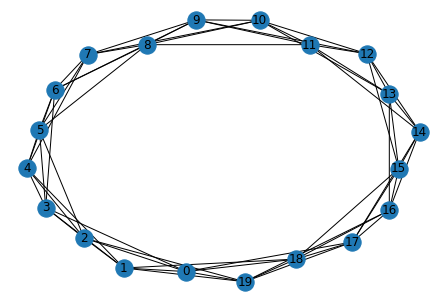

In [ ]:
nx.draw(anillo_20, with_labels = True)

## Vectorización

### Red lineal

In [ ]:
N = 20

np.array(range(N))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
nodos = np.arange(N)

Para agregar los enlaces de forma vectorial utilizaremos una nueva estructura llamada ```zip```, que intercala los elementos de listas o arreglos. En este caso nos servirá para aparear los nodos, cada uno con el siguiente, mediante el uso de índices de los arreglos. Para ver qué hay dentro de una estructura zip, convirtamosla en una lista:

In [ ]:
list(zip(nodos[:-1],nodos[1:]))

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (16, 17),
 (17, 18),
 (18, 19)]

Vemos entonces que nos da una lista de parejas de nodos tal y como lo deseamos. Usémoslo ahora para generar la red con estructura lineal

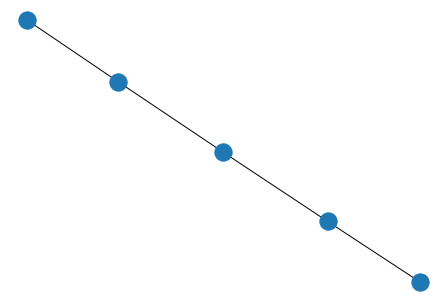

In [ ]:
N = 5

nodos = np.arange(N)

red_lineal = nx.Graph()

red_lineal.add_nodes_from(nodos)

red_lineal.add_edges_from( zip(nodos[:-1], nodos[1:] ) )

nx.draw(red_lineal)

In [ ]:
def Red_lineal(N):
  nodos = np.arange(N)

  red_lineal = nx.Graph()

  red_lineal.add_nodes_from(nodos)

  red_lineal.add_edges_from( zip(nodos[:-1], nodos[1:] ) )

  nx.draw(red_lineal)

  return red_lineal

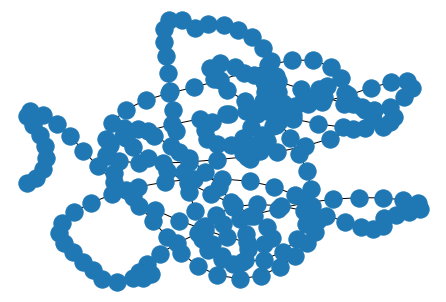

In [ ]:
Red_lineal(250)

### Red circular
Para generar la red circular pero ahora de forma vectorial, utilizaremos la función de numpy ```np.roll()```

In [ ]:
nodos = np.arange(20)
nodos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
np.roll(nodos, 1)

array([19,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18])

In [ ]:
#N = 20

def Red_circular(N):
  nodos = np.arange(N)

  circular = nx.Graph()

  circular.add_nodes_from(nodos)

  circular.add_edges_from( zip( nodos, np.roll(nodos, 1) ) )

  nx.draw(circular)
  
  return circular

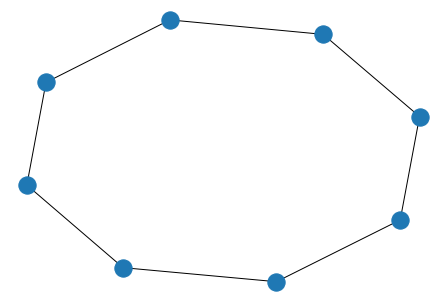

In [ ]:
Red_circular(8)

In [ ]:
def Red_anillo(N, d):
  nodos = np.arange(N)

  anillo = nx.Graph()

  anillo.add_nodes_from(nodos)

  for i in range(d):
    anillo.add_edges_from( zip( nodos, np.roll(nodos, i+1) ) )
  
  return anillo

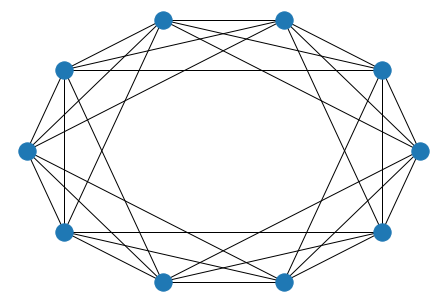

In [ ]:
Anillo = Red_anillo(10,3)
nx.draw_circular(Anillo)

### Red completa

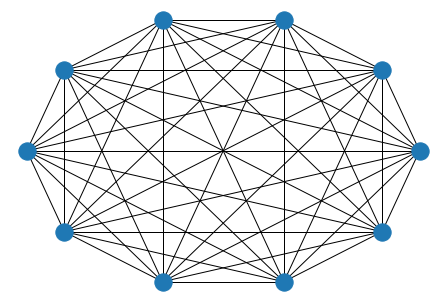

In [ ]:
N = 10

completa = nx.Graph()

for i in range(N):
  for j in range(i):
    completa.add_edge( i , j )

nx.draw_circular(completa)


# Arreglos de numpy y matriz de adyacencia
Ya que comprendemos el formalismo que nos permite pasar de redes a matrices (de adyacencia) y viceversa, podemos emplear funciones de NetworkX que nos permiten lo mismo pero para generar redes (Graph()) de networkx a partir de arreglos de numpy, y viceversa. Esto lo haremos mediante las funciones:
- ```nx.from_numpy_array( )```
- ```nx.to_numpy_array()```

Finalmente, utilizaremos la función ```plt.imshow()``` para visualizar las matrices de adyacencia mediante paletas de color que facilitarán el análisis de la estructura de la red.

In [ ]:
matriz = [[0,1,1,1], 
 [1,0,0,0], 
 [1,0,0,1], 
 [1,0,1,0]]

In [ ]:
A = np.array(matriz)

In [ ]:
G = nx.from_numpy_array( A )



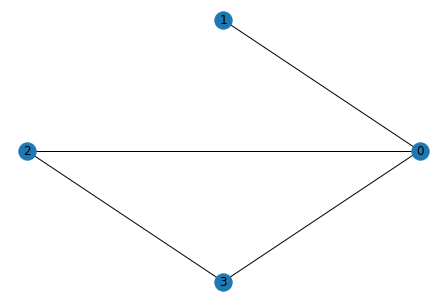

In [ ]:
nx.draw_circular(G,with_labels = True)

In [ ]:
A.dot(A).dot(A)

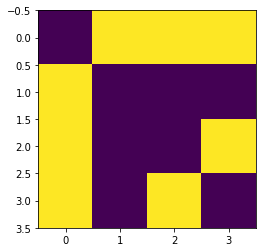

In [ ]:
plt.imshow(A)

In [ ]:
A = nx.to_numpy_array(G)

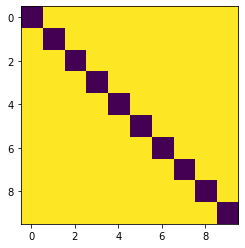

In [ ]:
A = nx.to_numpy_array(completa)

plt.imshow(A)

In [ ]:
red_anillo = Red_anillo(50, 2)

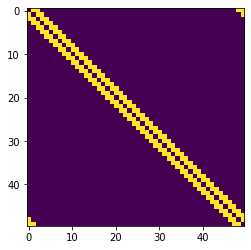

In [ ]:
A = nx.to_numpy_array(red_anillo)

plt.imshow(A)

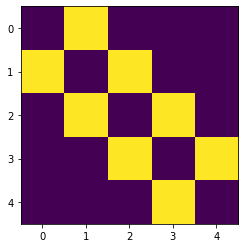

In [ ]:
A = nx.to_numpy_array(red_lineal)
plt.imshow(A)

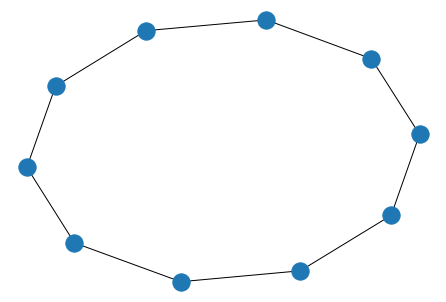

In [ ]:
circular = Red_circular(10)

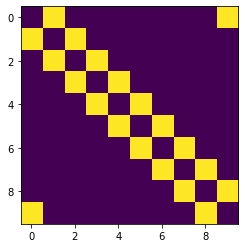

In [ ]:
A = nx.to_numpy_array(circular)

plt.imshow(A)

In [ ]:
A = np.array(
    [[0,1,1,1,0,1],
     [1,0,1,1,0,0],
     [1,1,0,0,0,1],
     [1,1,0,0,0,0],
     [0,0,0,0,0,0],
     [1,0,1,0,0,0]
     ]

)

In [ ]:
G = nx.from_numpy_array(A)

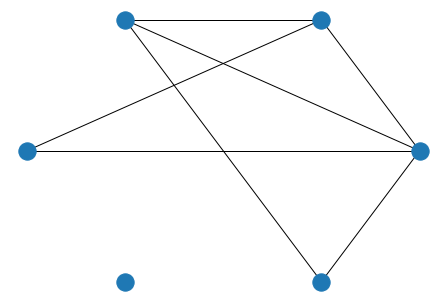

In [ ]:
nx.draw_circular(G)

Igualmente, como sabemos, las potencias de la matriz de adyacencia proporcionan el número de caminos entre parejas de nodos. Esto puede utilizarse mediante la función ```dot``` de numpy, con la cual podemos obtener las potencias de la matriz de adyacencia. A continuación se obtiene el cubo de ```A```, lo que nos daría el número de caminos de longitud tres entre todas las parejas de nodos. Verifica que esta información coincida con la red previamente visualizada (tal vez sean útiles las etiquetas de los nodos).

In [ ]:
A.dot(A).dot(A)

# Red dirigidas y red con multienlaces

## Dirigida (DiGraph)

In [ ]:
G = nx.DiGraph()
G.add_edge('Nodo 1', 'Nodo 5')
G.add_edge('Nodo 1', 'Nodo 4')
G.add_edge('Nodo 2', 'Nodo 3')
G.add_edge('Nodo 3', 'Nodo 5')
G.add_edge('Nodo 2', 'Nodo 5')

nx.draw(G, with_labels = True)

## Multienlaces (MultiGraph)

In [ ]:
GM = nx.MultiGraph()

GM.add_edge(0,1)
GM.add_edge(0,2)
GM.add_edge(0,3)
GM.add_edge(0,1)
GM.add_edge(0,1)
GM.add_edge(0,1)